In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cereals=pd.read_csv('E:\\cereals.csv',encoding='latin1')
cereals

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,...,1.0,0.75,39.106174,1,0,0,0,1,0,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,...,1.0,1.00,27.753301,1,0,0,0,1,0,0
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,...,1.0,0.67,49.787445,1,0,0,0,0,1,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,...,1.0,1.00,51.592193,1,0,0,0,1,0,0


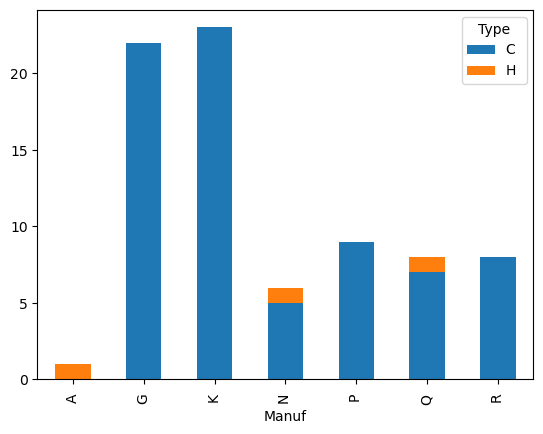

In [3]:
#1
#bar graph of manuf with type overlay

crosstab0=pd.crosstab(cereals['Manuf'],cereals['Type'])
crosstab0.plot(kind='bar',stacked=True)
crosstabnorm=crosstab0.div(crosstab0.sum(1),axis=0)

<Axes: xlabel='Manuf'>

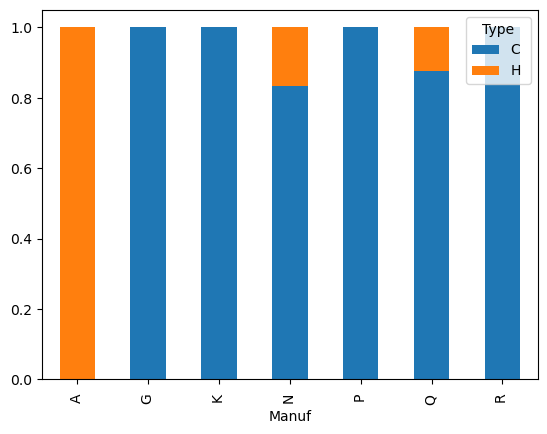

In [4]:
#2
#Normalized bar graph of manuf with response type
crosstabnorm.plot(kind='bar', stacked = True)

In [6]:
cereals_crosstab = pd.crosstab(cereals['Manuf'], 
                            cereals['Type'],  
                               margins = False) 
print(cereals_crosstab)

Type   C   H 
Manuf        
A       0   1
G      22   0
K      23   0
N       5   1
P       9   0
Q       7   1
R       8   0


In [3]:
#3
cereals_crosstab = pd.crosstab(cereals['Type'], 
                            cereals['Manuf'],  
                               margins = False) 
print(cereals_crosstab)

Manuf  A   G   K   N   P   Q   R 
Type                             
C       0  22  23   5   9   7   8
H       1   0   0   1   0   1   0


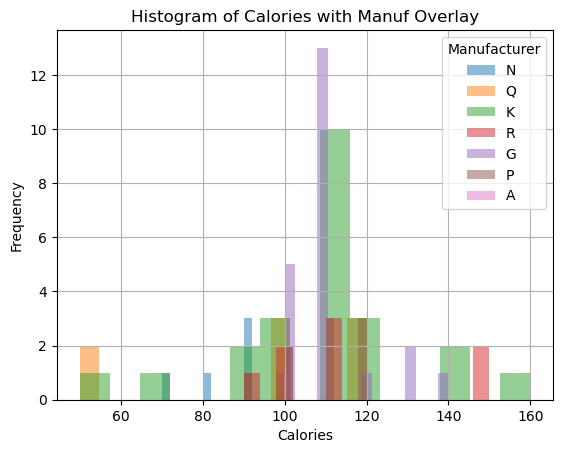

In [4]:
#4
#histogram of calories with type overlay
for manufacturer in cereals['Manuf'].unique():
    plt.hist(cereals[cereals['Manuf'] == manufacturer]['Calories'], bins=15, alpha=0.5, label=manufacturer)

plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories with Manuf Overlay')
plt.legend(title='Manufacturer')
plt.grid(True)
plt.show()

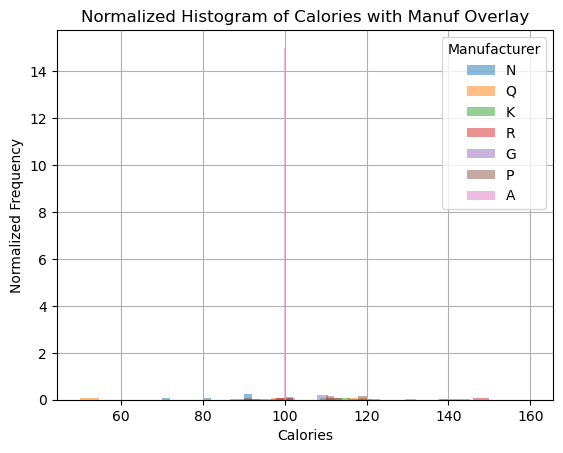

In [11]:
#5
for manufacturer in cereals['Manuf'].unique():
    subset = cereals[cereals['Manuf'] == manufacturer]
    plt.hist(subset['Calories'], bins=15, density=True, alpha=0.5, label=manufacturer)

plt.xlabel('Calories')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Calories with Manuf Overlay')
plt.legend(title='Manufacturer')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Bar Graph of calories (Binned) with manuf Overlay'}, xlabel='Calories_binned'>

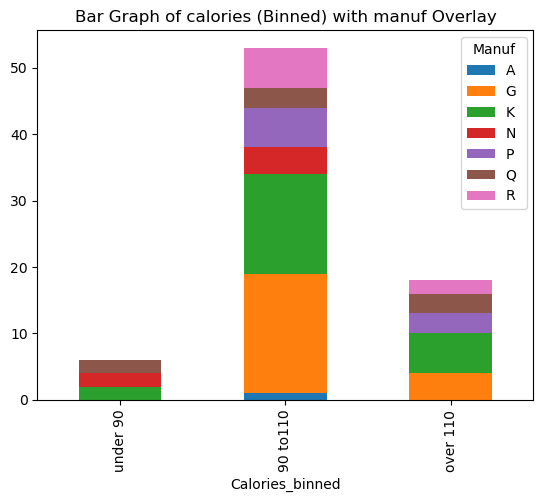

In [12]:
#Bin the calories variable using the bins specified and create a bar chart of the binned calories variable with manuf overlay
cereals['Calories_binned']=pd.cut(x=cereals['Calories'],bins=[0,90,110.1,2000],labels=['under 90','90 to110','over 110'],right=False)
crosstab_02 = pd.crosstab(cereals['Calories_binned'], 
cereals['Manuf'])
crosstab_02.plot(kind='bar', stacked = True,
 title = 'Bar Graph of calories (Binned) with manuf Overlay')